# Evaluate computational runtimes
The purpose of this notebook is to analyze and plot computational runtimes generated for a list of taxonomy assignment methods in [this notebook](./compute-runtimes.ipynb).

In [1]:
from os.path import expandvars
from tax_credit.plotting_functions import (lmplot_from_data_frame, calculate_linear_regress)
import pandas as pd
from os.path import join
import seaborn.xkcd_rgb as colors

First, load the results file generated in [this notebook](./compute-runtimes.ipynb). Modify the contents of the following cell, then "run all" cells.

In [3]:
runtime_results = expandvars('$HOME/Desktop/projects/tax-credit-runtime/runtime_results.txt')
outdir = expandvars('$HOME/Desktop/plots/')

In [4]:
df = pd.read_csv(runtime_results, header=None, sep='\t', 
                 names=["Method", "Number of Query Sequences",
                        "Number of Reference Sequences",
                        "Iteration", "Runtime (s)"])
df = df.groupby(("Method", "Number of Query Sequences",
                 "Number of Reference Sequences")).median().reset_index()

In [5]:
color_palette={
    'rdp': colors['baby shit green'], 'sortmerna': colors['macaroni and cheese'],
    'uclust': 'coral', 'blast': 'indigo', 'blast+': colors['electric purple'], 'naive-bayes': 'dodgerblue',
    'vsearch': 'firebrick'
}


## Runtime as a function of number of reference sequences
In these plots, only a single query sequence is searched against the reference database, so the lines illustrate the effect of number of reference sequences on runtime.  This tells us how long it takes to assign taxonomy to the first sequence in our database, and therefore provides a measure of time needed to index the reference. We are primarily interested in the slope of the line, which indicates the effect of additional reference sequences.

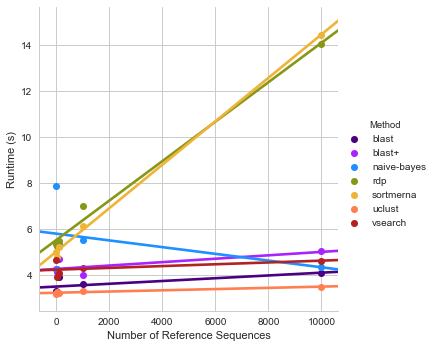

Method     Slope  Intercept         R     P-val  Std Error
0        blast  0.000060   3.477015  0.722247  0.168207   0.000033
1       blast+  0.000074   4.242723  0.772825  0.125457   0.000035
2  naive-bayes -0.000146   5.777330 -0.440780  0.457525   0.000172
3          rdp  0.000858   5.507077  0.995349  0.000381   0.000048
4    sortmerna  0.000945   5.002367  0.999216  0.000026   0.000022
5       uclust  0.000027   3.207420  0.966544  0.007309   0.000004
6      vsearch  0.000039   4.210387  0.530817  0.357381   0.000036

In [7]:
lm, reg = lmplot_from_data_frame(df[df["Number of Query Sequences"] == 1],
                                 "Number of Reference Sequences", "Runtime (s)", 
                                 hue="Method", regress=True, color_palette=color_palette)
reg

In [8]:
lm.savefig(join(outdir, 'runtime_by_refcount.pdf'))

## Runtime as a function of number of query sequences
These plots gives us an idea of how runtime scales with number of input sequences by varying the number of sequences that taxonomy is assigned to. Since database indexing is included in all of these steps, we care most about the slope of the line and very little about the y-intercept (which represents how long the database takes to index, and is a step can be typically performed once for multiple runs of a taxonomic assigner so it's a one-time cost and thus isn't as important.

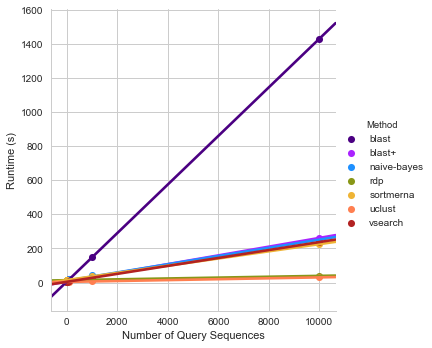

Method     Slope  Intercept         R         P-val  Std Error
0        blast  0.142721   5.560904  0.999994  1.969482e-08   0.000296
1       blast+  0.025660   5.533586  0.999991  3.239439e-08   0.000063
2  naive-bayes  0.024100  11.128306  0.997689  1.333428e-04   0.000948
3          rdp  0.002543  13.722656  0.997643  1.373013e-04   0.000101
4    sortmerna  0.021109  14.571249  0.999638  8.261863e-06   0.000328
5       uclust  0.002660   3.708455  0.999688  6.603372e-06   0.000038
6      vsearch  0.023339   4.341747  0.999987  5.842472e-08   0.000070

In [11]:
lm, reg = lmplot_from_data_frame(df[df["Number of Reference Sequences"] == 10000],
                                 "Number of Query Sequences", "Runtime (s)",
                                 hue="Method", regress=True, color_palette=color_palette)
reg

In [12]:
lm.savefig(join(outdir, 'runtime_by_querycount.pdf'))